# You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualizations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb. Be creative :) 


## *Importing the relevent libraries to be used to for this dataset.*

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


*Read automobile.txt datatset using the read_csv() pandas method*

In [29]:
automobile = pd.read_csv("automobile.txt")

# display first 6 records from the automobile dataset
automobile.head(6)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


The question marks (?) represent missing values in the dataframe, this could hinder further data analysis of the dataset(missing values).

*Identifying and deciding how to deal or handle missing data values.*

In [30]:
# Get the information on the number of rows and columns of the dataset
automobile.shape

(205, 26)

The dataset has '?' which will be replaced by nan values.

In [31]:
automobile.replace('?', np.nan, inplace = True)
# important for logical meaning and easily to deal with in pandas
automobile.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### *Statistical analysis of dataset*

In [32]:
automobile.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


#### *Asses for missing values in dataset* 


In [33]:
# After replacing '?' marks with nan values we can use isnull() function
missing_values = automobile.isnull()

# Display the 5 records who have nan values with True and false for those with no nan values.
missing_values.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


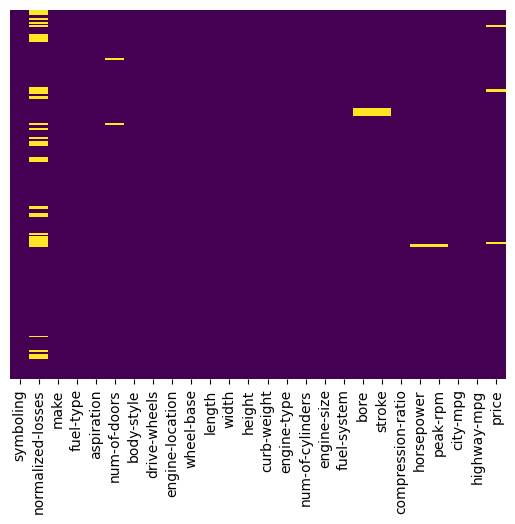

In [34]:
# Plot the missing data to be able to visualize it and see it properly, using a heatmap.
plt.style.use('default')

sns.heatmap(automobile.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

It can be seen that 7 columns have missing data.

In [35]:
# count missing values for each column
automobile.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

The following columns have missing values:

price                 4 - price column has 4 missing values

peak-rpm              2 - peak-rpm column has 2 missing values

horsepower            2 - horsepower column has 2 missing values

stroke                4 - stroke column has 2 missing values

bore                  4 - bore column has 2 missing values

num-of-doors          2 - num-of-doors column has 2 missing values

normalized-losses    41 - normalized-losses column has 41 missing values

Every column/attribute(26) has 205 records. The dataset has 7 columns with missing data 

In [36]:
automobile.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [37]:
# Replace *Nan* in columns_nan with mean of their respective columns
columns_nan = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']

for i in columns_nan:
    automobile_mean = automobile[i].astype(float).mean(axis = 0)
    automobile[i].replace(np.nan, automobile_mean, inplace = True)

 Replace *Nan* in 'num-of-doors' with the most frequent class of the column


In [38]:
# find the most frequent num-of-doors type
automobile['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

It can be seen that the most frequent class is *'four'* doors

In [39]:
# Now we replace the four number of doors in the missing Nan values of num-of-doors column

automobile['num-of-doors'].replace('NaN', 'four', inplace = True)


Lets take a look at the cleaned data by using the heatmap

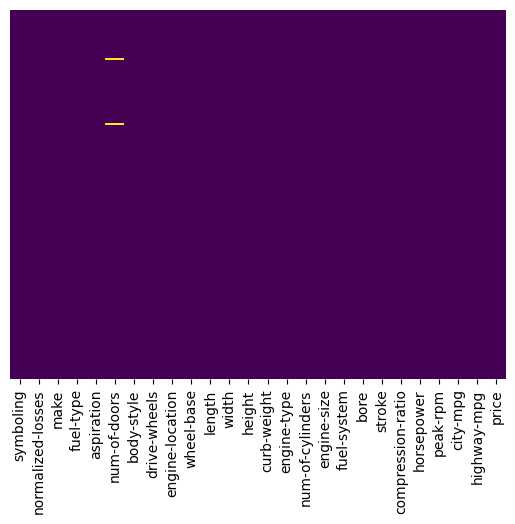

In [40]:
# Plot the missing data to be able to visualize it and see it properly, using a heatmap.
plt.style.use('default')

sns.heatmap(automobile.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [41]:
# count missing values for each column
automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

*We can see from the heatmap that two missing num-of-doors columns are missing after data cleaning and replacement. I decided to drop the two rows, as can be seen below.*

In [42]:
# for certain columns drop the entire rows
automobile.dropna(subset = ['num-of-doors'], axis = 0, inplace = True)

# reset index because we dropped two columns
automobile.reset_index(drop = True, inplace = True)

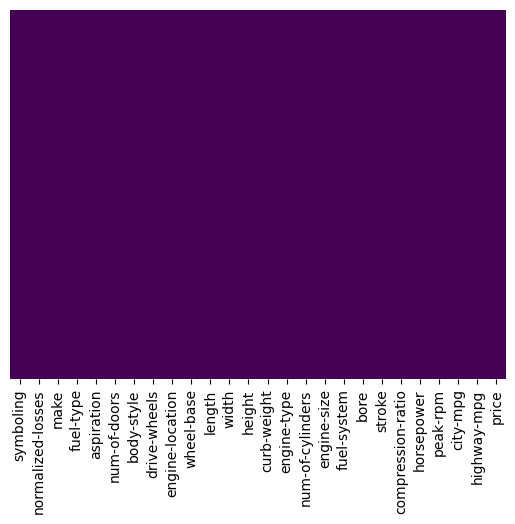

In [43]:
# Plot the missing data to be able to visualize it and see it properly, using a heatmap.
plt.style.use('default')

sns.heatmap(automobile.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')
plt.show()

In [44]:
# count missing values for each column
automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [45]:
# The dataframe now has 203 rows and 26 columns
display(automobile.head())
display(automobile.shape)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


(203, 26)

*We can see now the dataset has no missing values.*

#### Confirm correct data set format

In [46]:
# Get information of the data types of the automobile dataset columns 
automobile.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

It can be observed from the data above that certain columns are not of the correct data type. Strings(categoral variables) columns should be of type object while numerical objects should beof type float or type integer. The following columns For example stroke, bore, price describe engine capacity and price of cars but they are of type object, respectively. They need to have their types changed to float or integer. 

In [47]:
# Correcting data type format for columns 
automobile[['peak-rpm', 'bore', 'stroke', 'normalized-losses']] = automobile[['peak-rpm', 'bore', 'stroke', 'normalized-losses']].astype('float')
automobile[['price', 'horsepower']] = automobile[['price', 'horsepower']].astype('int')

In [48]:
automobile.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

*It can be seen every column is of correct data format.*

## DATA STORIES AND VISUALIZATIONS

In [49]:
automobile.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [50]:
# The total number of car make is 22
len(automobile.make.unique())

22

## Automobile Make Total Number 

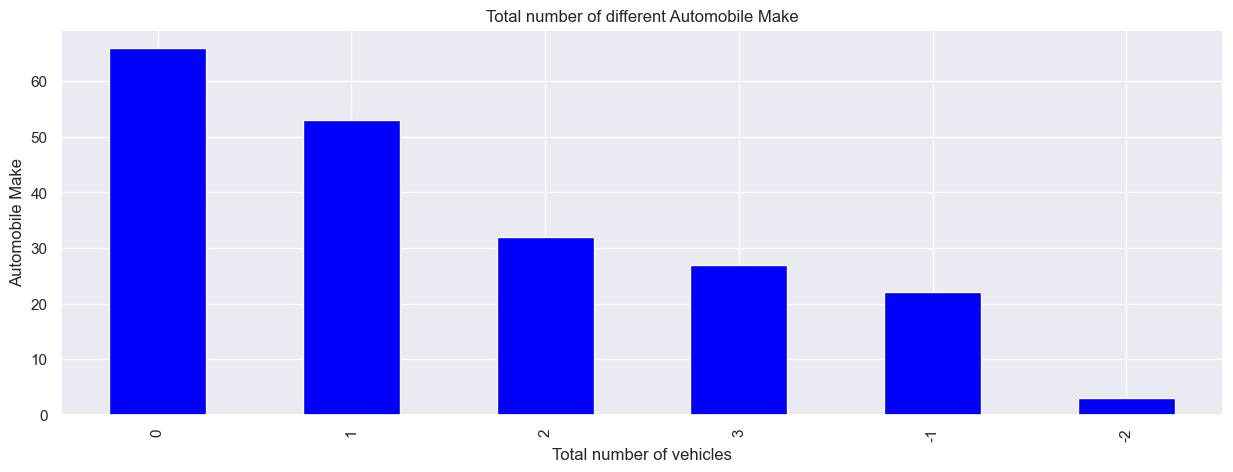

In [51]:
plt.style.use('default')
sns.set(style = 'darkgrid')

automobile.symboling.value_counts().nlargest(22).plot(kind='bar', color = 'blue', figsize=(15,5))

plt.title("Total number of different Automobile Make")
plt.ylabel('Automobile Make')
plt.xlabel('Total number of vehicles')
plt.show()

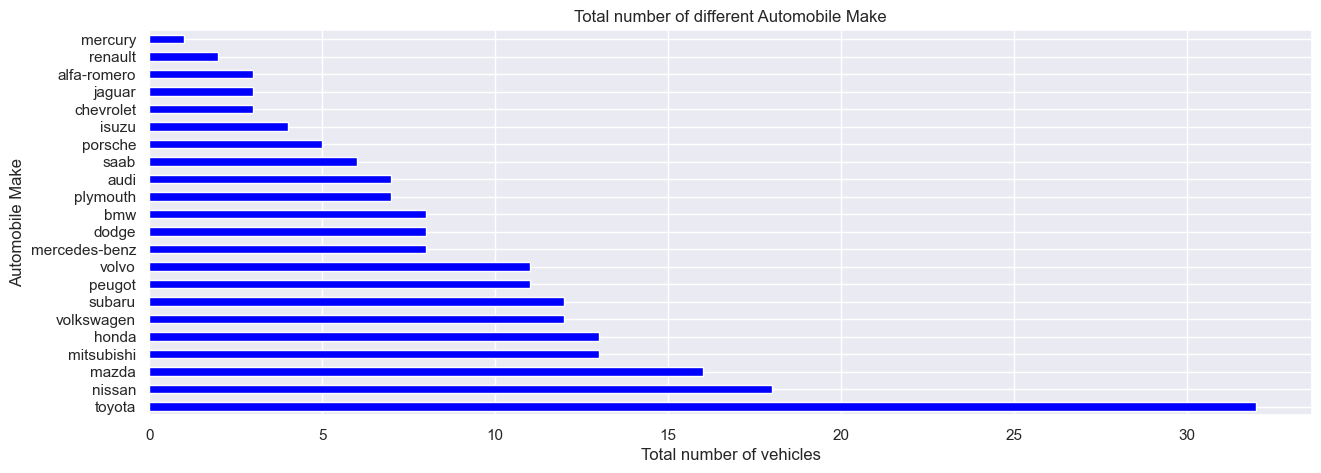

In [52]:
plt.style.use('default')
sns.set(style = 'darkgrid')

automobile.make.value_counts().nlargest(22).plot(kind='barh', color = 'blue', figsize=(15,5))

plt.title("Total number of different Automobile Make")
plt.ylabel('Automobile Make')
plt.xlabel('Total number of vehicles')
plt.show()

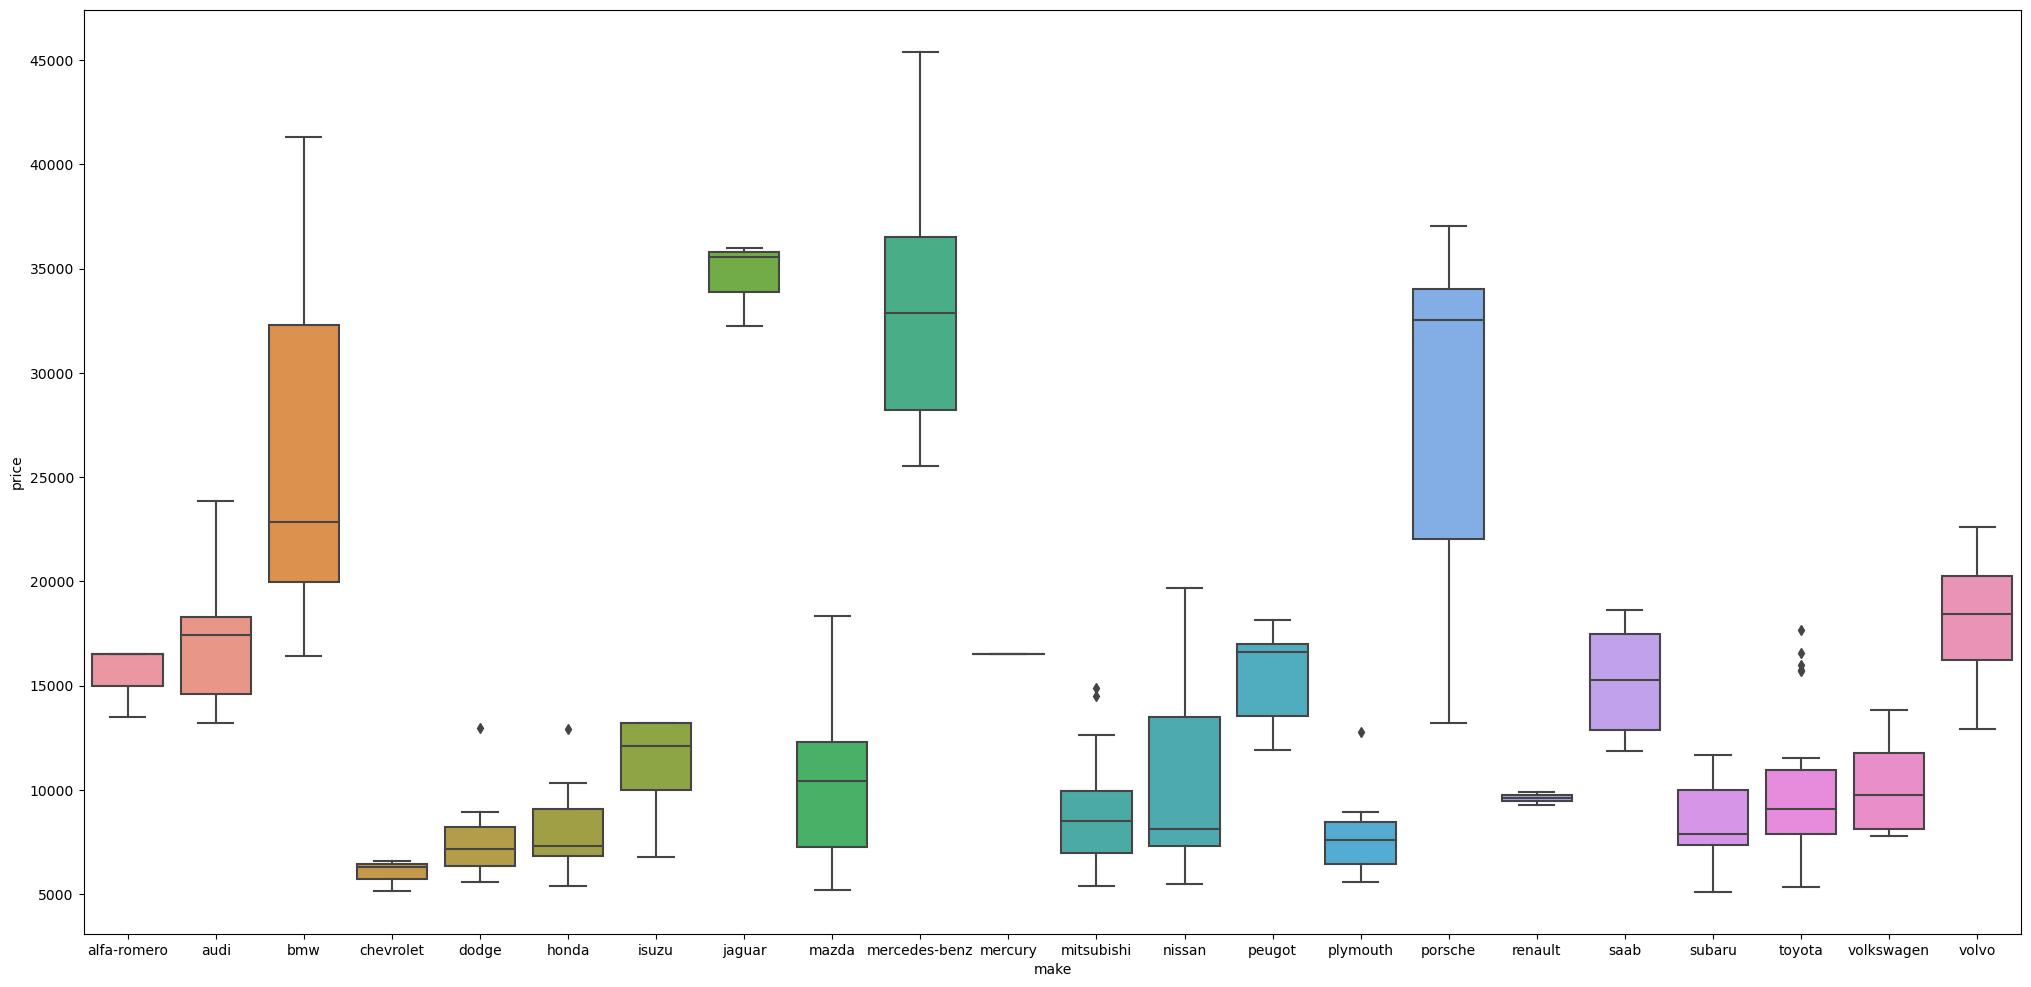

In [53]:
plt.style.use('default')
plt.rcParams['figure.figsize']=(25,12)
ax = sns.boxplot(x="make", y="price", data=automobile)

Toyota, Nissan, Mazda, Mitsubishi and Honda have the largest automobile Make available in the dataset respectively. 

## Insurance risk ratings

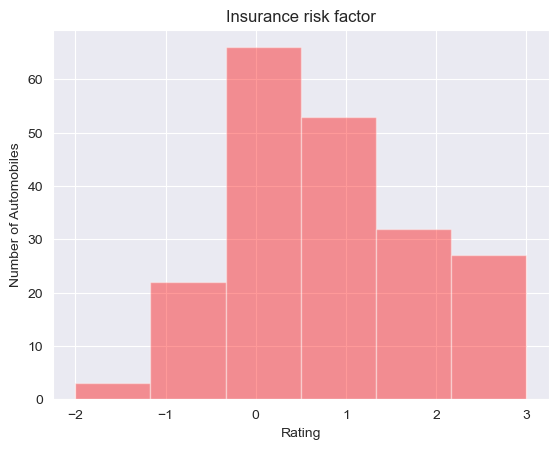

In [54]:
plt.style.use('default')
sns.set_style('darkgrid') 
sns.distplot(automobile.symboling, kde = False, color ='red', bins = 6)
plt.title('Insurance risk factor')
plt.xlabel('Rating')
plt.ylabel('Number of Automobiles')
plt.show()

Symboling, corresponds to the insurance risk level of a car. Cars are initially assigned a risk factor symbol associated with their price. Then, if an automobile is riskier, this symbol is adjusted by moving it up the scale. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

## Normalized-losses

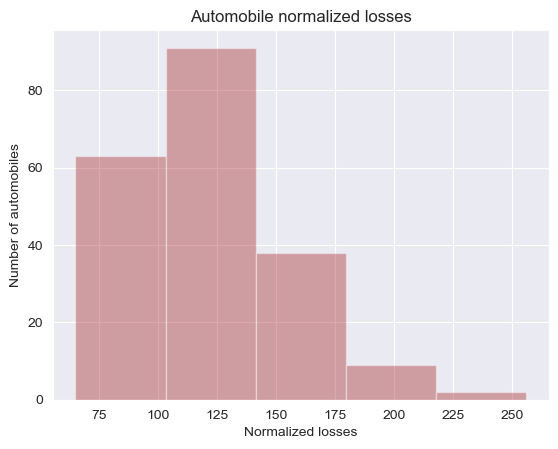

In [55]:
plt.style.use('default')
sns.set_style('darkgrid') 
sns.distplot(automobile['normalized-losses'], kde = False, color ='brown', bins = 5)
plt.title('Automobile normalized losses')
plt.ylabel('Number of automobiles')
plt.xlabel('Normalized losses')
plt.show()

The second attribute “normalized-losses” is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door, small, station wagons, sports/specialty, etc…), and represents the average loss per car per year. The values range from 65 to 256. The other attributes are easy to understand.

### Fuel type

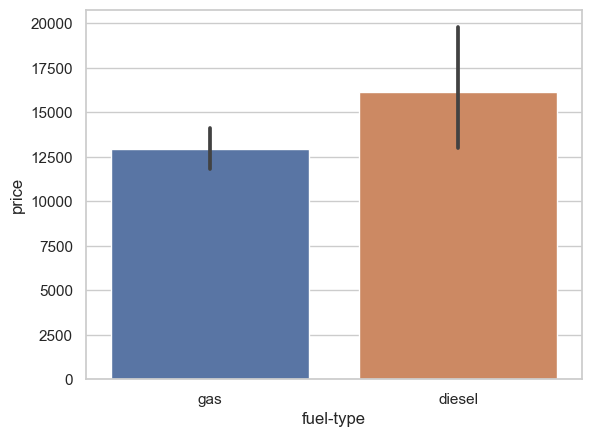

In [58]:
plt.style.use('default')
sns.set(style = 'whitegrid')

ax=sns.barplot(x='fuel-type', y='price', data=automobile)
plt.show()

Gas Automobiles are cheaper except for a selected few, while disel automobiles prices are farely distributed.

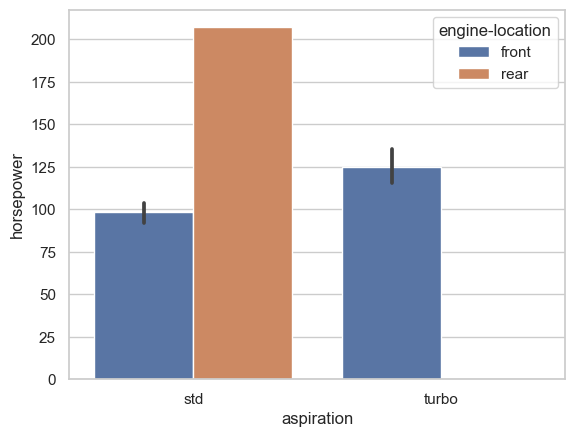

In [69]:
plt.style.use('default')
sns.set(style = 'whitegrid')

ax=sns.barplot(x='aspiration', y='horsepower', hue = 'engine-location', data=automobile)
plt.show()

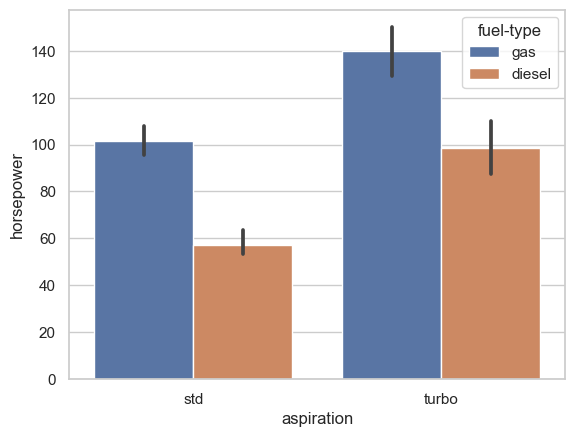

In [72]:
plt.style.use('default')
sns.set(style = 'whitegrid')

ax=sns.barplot(x='aspiration', y='horsepower', hue = 'fuel-type', data=automobile)
plt.show()

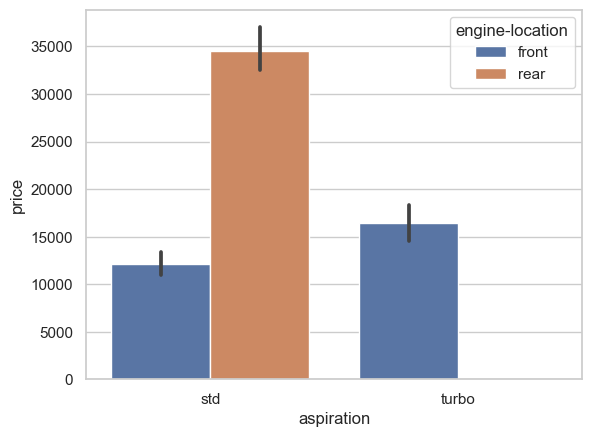

In [59]:
plt.style.use('default')
sns.set(style = 'whitegrid')

ax=sns.barplot(x='aspiration', y='price', hue = 'engine-location', data=automobile)
plt.show()

Standard automobiles have the cheapest cars to most expensive. Turbo automobile price range is 7 500 to 32 000 compared to a standard automobile price range of 5000 to 45 000.

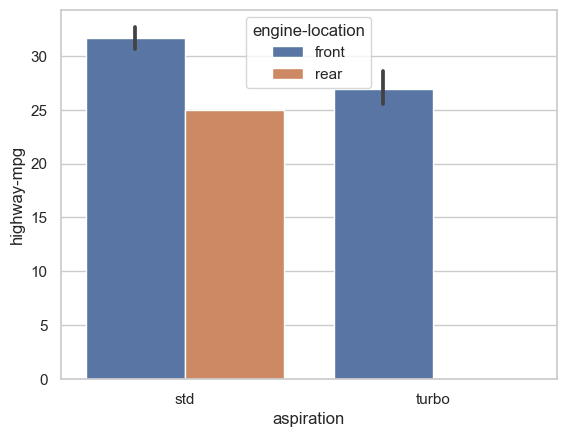

In [60]:
plt.style.use('default')
sns.set(style = 'whitegrid')

ax=sns.barplot(x='aspiration', y='highway-mpg', hue = 'engine-location', data=automobile)
plt.show()
# drive-wheels

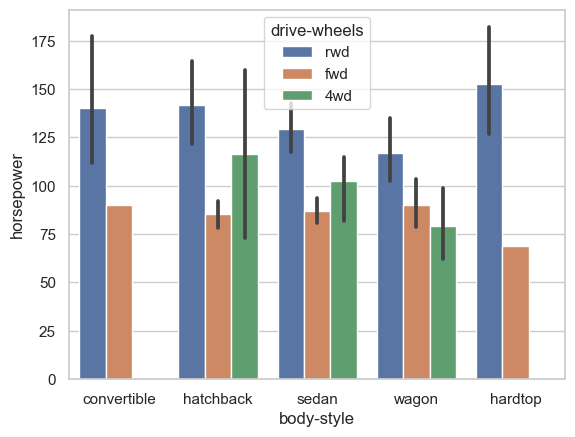

In [62]:
plt.style.use('default')
sns.set(style = 'whitegrid')

ax=sns.barplot(x='body-style', y='horsepower', hue = 'drive-wheels', data=automobile)
plt.show()


From the two graphs above one can conclude that a turbo automobile uses less mpg on a highway compared to a standard automobile

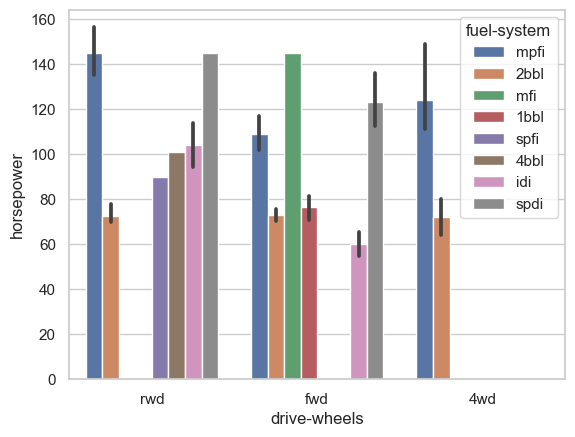

In [63]:
plt.style.use('default')
sns.set(style = 'whitegrid')

ax=sns.barplot(x='drive-wheels', y='horsepower', hue = 'fuel-system', data=automobile)
plt.show()
# drive-wheels

From the above visualization an automobile running on diesel will consume more fuel on a highway compared to a gas automobile.

It can be concluded from the above visualizations that gas automobiles have a higher horsepower than diesel in this dataset. The higher the horsepower the higher the price, but the automobile consumes less fuel on the highway compared to diesel automobile.

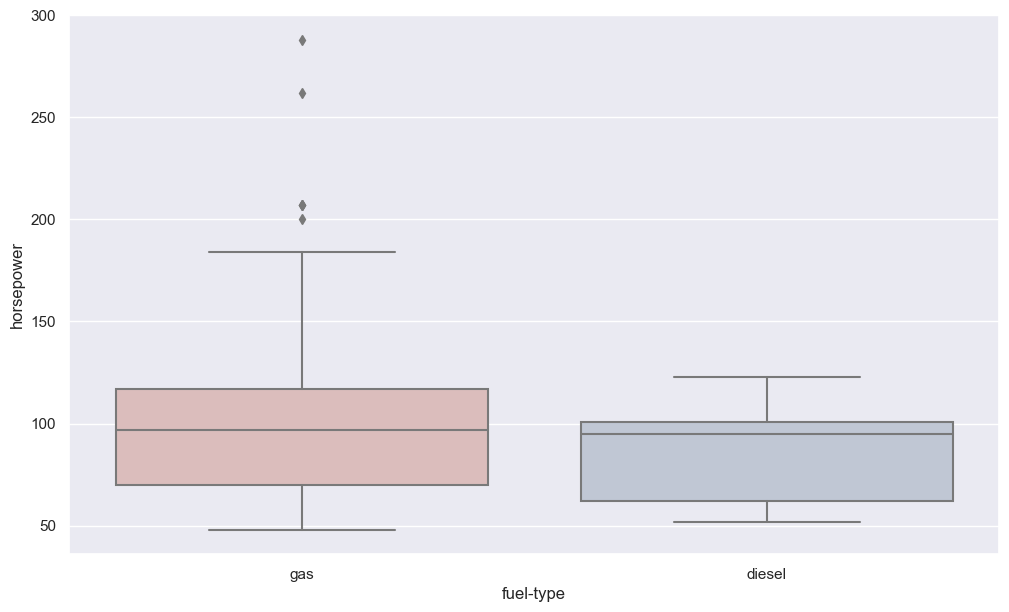

In [73]:
plt.style.use('default')
sns.set(style = 'darkgrid')
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'fuel-type', y = 'horsepower', data = automobile, palette  = 'vlag_r')
plt.show()

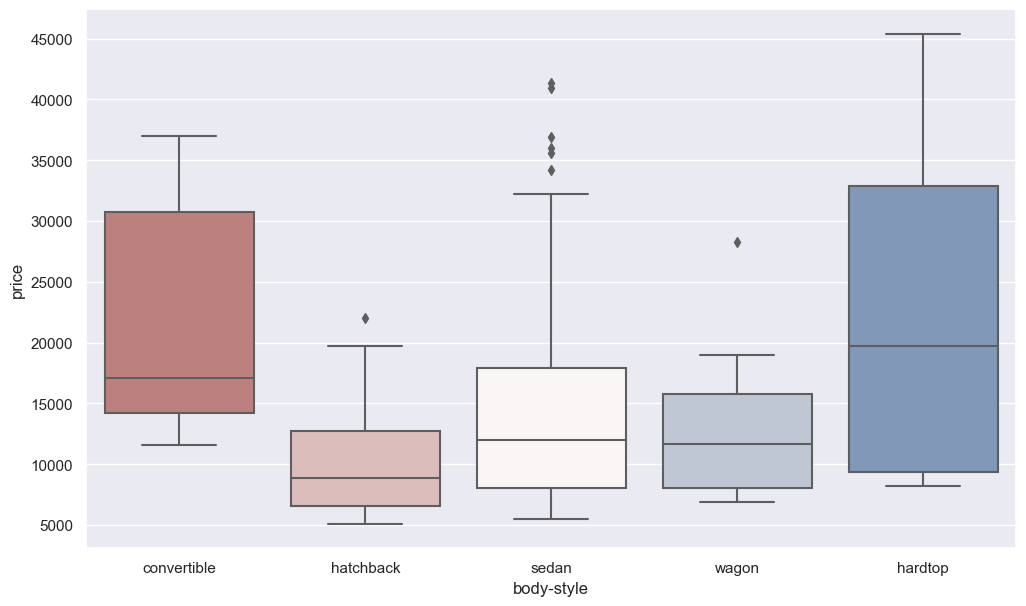

In [398]:
plt.style.use('default')
sns.set(style = 'darkgrid')
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'body-style', y = 'price', data = automobile, palette  = 'vlag_r')
plt.show()

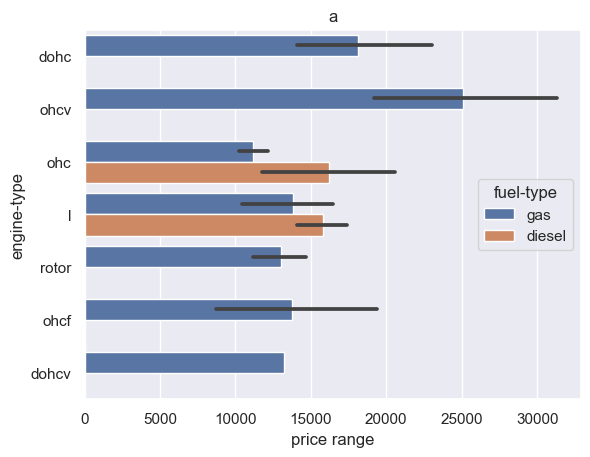

In [399]:
# Divide Fare into 4 bins 
automobile['body-style'] = pd.qcut(automobile['price'], 4) 
  
sns.barplot(x = 'price', y = 'engine-type', hue = 'fuel-type', data = automobile)
plt.xlabel('price range')
plt.title("a")
plt.show()

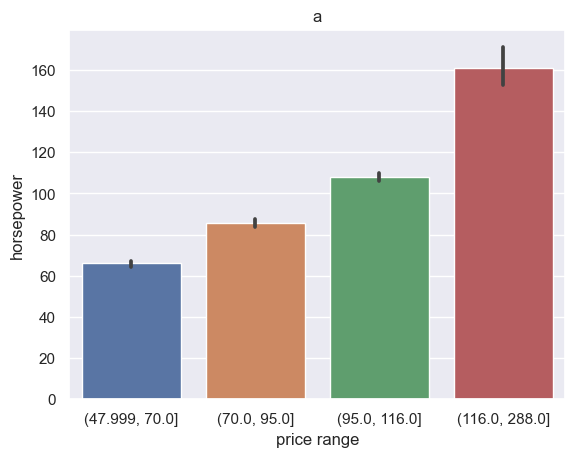

In [400]:
# Divide Fare into 4 bins 
automobile['price'] = pd.qcut(automobile['horsepower'], 4) 
  
# Barplot - Shows approximate values based  
# on the height of bars. 
sns.barplot(x ='price', y ='horsepower', data = automobile)
plt.xlabel('price range')
plt.title("a")
plt.show()


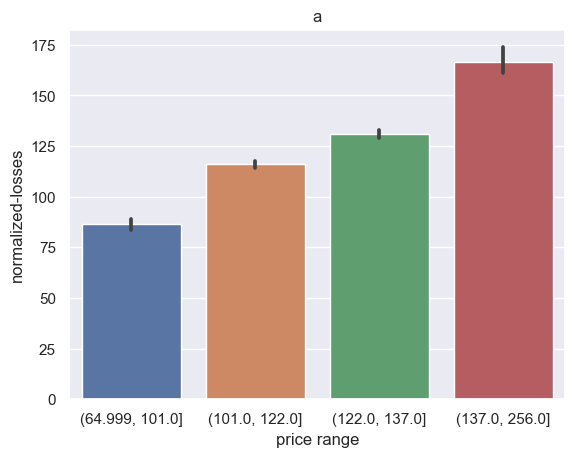

In [401]:
# Divide Fare into 4 bins 
automobile['price'] = pd.qcut(automobile['normalized-losses'], 4) 
  
# Barplot - Shows approximate values based  
# on the height of bars. 
sns.barplot(x ='price', y ='normalized-losses', data = automobile)
plt.xlabel('price range')
plt.title("a")
plt.show()


Text(0, 0.5, 'Vehicle type')

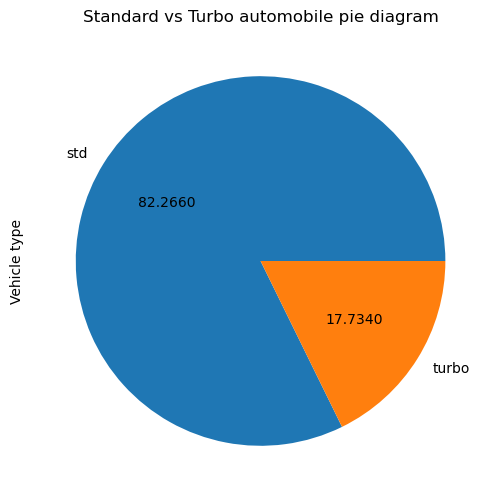

In [74]:
plt.style.use('default')
# sns.set(style = 'darkgrid')
automobile['aspiration'].value_counts().plot.pie(figsize=(6, 6), autopct='%.4f')
plt.title("Standard vs Turbo automobile pie diagram")
plt.ylabel('Vehicle type')


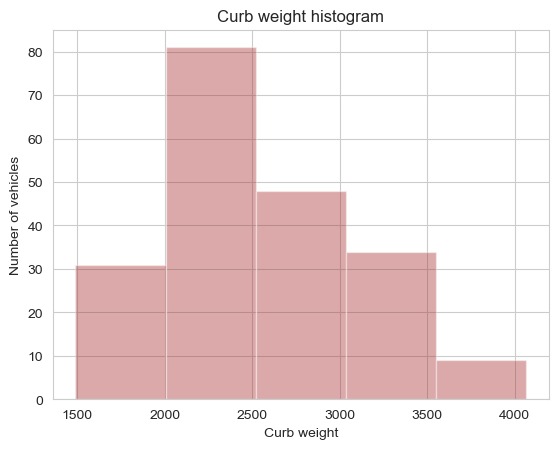

In [403]:
plt.style.use('default')
sns.set_style('whitegrid') 
sns.distplot(automobile['curb-weight'], kde = False, color ='brown', bins = 5)
plt.title("Curb weight histogram")
plt.ylabel('Number of vehicles')
plt.xlabel('Curb weight')
plt.show()

## Drive wheels

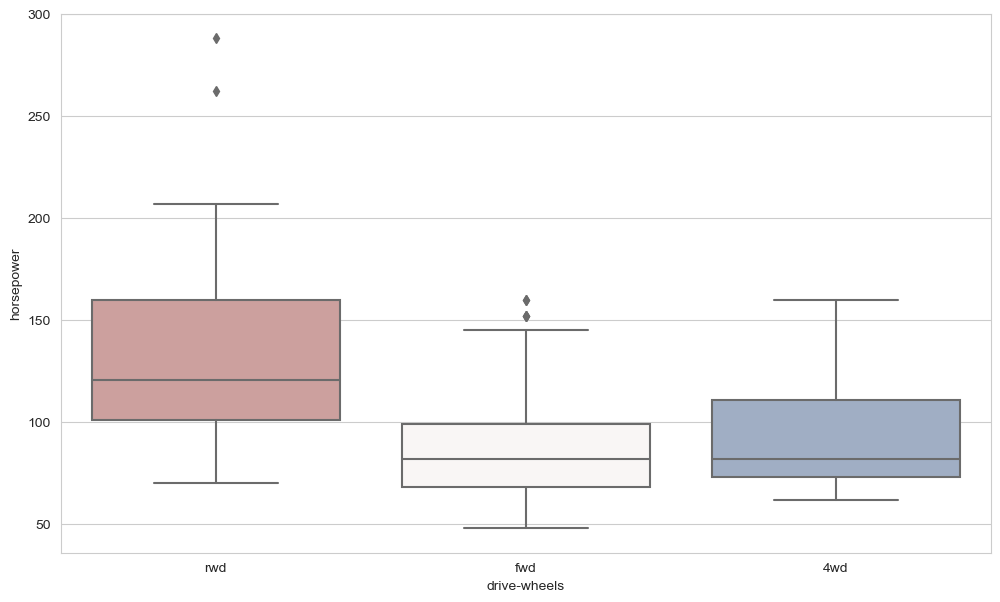

In [404]:
# plt.style.use('default')
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'drive-wheels', y = 'horsepower', data = automobile, palette  = 'vlag_r')
plt.show()

RWD has more horse power than FWD and Four-WD respectively

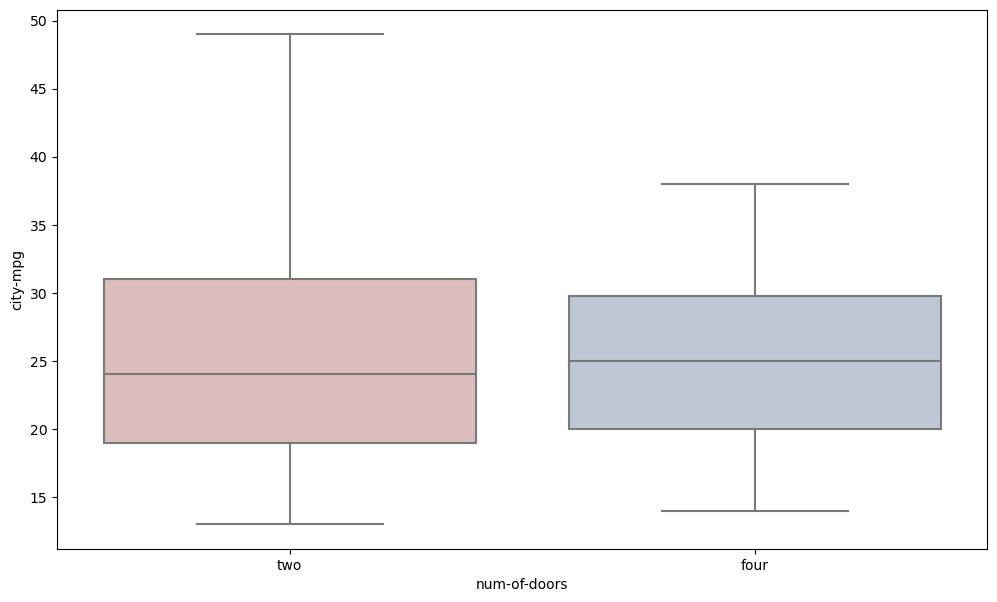

In [405]:
plt.style.use('default')
plt.figure(figsize = (12, 7))
sns.boxplot(x = 'num-of-doors', y = 'city-mpg', data = automobile, palette  = 'vlag_r')
plt.show()

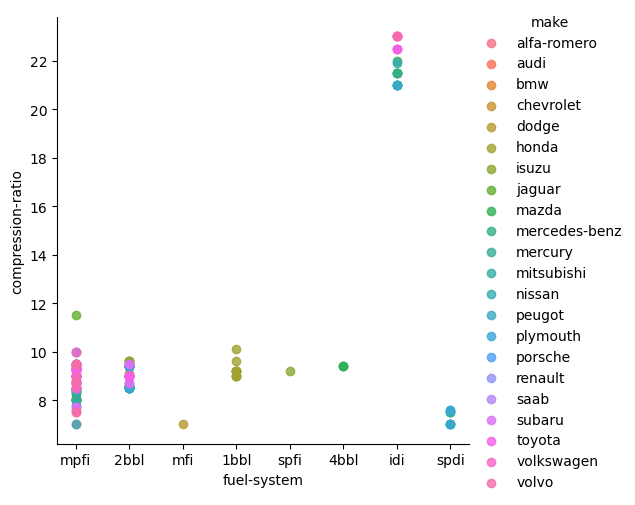

In [406]:
sns.lmplot(x ='fuel-system', y ='compression-ratio', fit_reg = False, hue = 'make', data = automobile)
  
# Show the plot 
plt.show() 

Compression ratios usually range from 8:1 to 10:1. A higher compression ratio -- say, from 12:1 to 14:1 -- means higher combustion efficiency. Higher compression ratios and combustion efficiency mean more power with less fuel, and fewer exhaust gases.

## Conclusion

The most important thing to consider when purchasing an automobile that is contained in the data set, would be horsepower, fuel type, drive-wheels and pricing. These factors can help you narrow your selection when it comes to the type of automobile you want. The visualization of the automobile dataset helps the consumer to select the best option. The visualization helps compare automobiles based on different factors, than just looking for a particular brand of automobile.


# References 

EDA for Automobile Dataset, viewed 30 November 2020, <https://www.kaggle.com/toramky/eda-for-automobile-dataset>

Sriram, 2018, Let us do Data Analysis with Python, viewed 25 November 2020,<https://medium.com/@sriramselvank/let-us-do-data-analysis-with-python-db2cb6eca43f>
